In [10]:
from Document import Document
from ParserCACM import ParserCACM
from ParserQuery import QueryParser
from porter import stem
from TextRepresenter import PorterStemmer
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean
from EvalIRModel import EvalIRModel

from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean, WeighterVector
from IRModel import Vectoriel, LanguageModel, BM25Model, LinearMetaModel
from Featurer import Featurer

from Evaluation import IRList, PrecisionRecallEval
from ParserQuery import Query

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Le configuration des modèles

In [29]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()

weighter = WeighterVector(index)

models = {}
models["vectoriel"] = Vectoriel(weighter)
models["bm25"] = BM25Model(weighter)
models["meta"] = LinearMetaModel(Featurer(index))
model_names = list(models.keys())

precalcul features


### La preparation des modèles
Registre les meilleurs paramètres ou effectue l'apprentissage des poids.

In [37]:
# Vectoriel

# bm25

# LinearMetaModel

models["meta"].load_weights()

## Evaluation

In [30]:
bm25_output = EvalIRModel().evalModel(models["bm25"], 
                                      ranking_call = lambda m,q : m.getRanking(q, k1=2, b=0.95))
meta_output = EvalIRModel().evalModel(models["meta"])

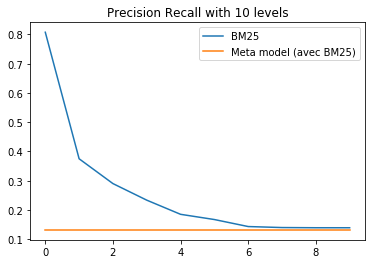

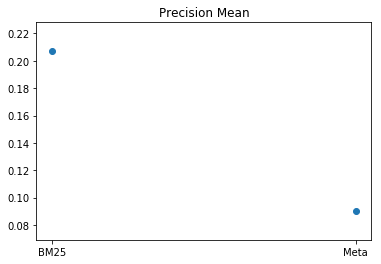

In [43]:
plt.figure()
y = bm25_output['precision_recall']
plt.plot(range(len(y)), y, label="BM25")
y = meta_output['precision_recall']
plt.plot(range(len(y)), y, label="Meta model (avec BM25)")
plt.title("Precision Recall with 10 levels")
plt.legend()
plt.show()

plt.figure()
plt.scatter(["BM25", "Meta"], [bm25_output['precision_mean'], meta_output['precision_mean']])
plt.title("Precision Mean")
plt.show()

We can see, that Meta model does not perform very vell compared to BM25 model. In the training of the metamodel, we did not consider the evaluation scores (only the loss that do depelop nicely), so the problem might be overfitting.